In [11]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd

# Корреляция

корелляция - измерение линейной зависимости двух переменных

$${\displaystyle r_{xy}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$$

Здесь верх - насколько отклонение от среднего совпадает по знаку, а низ - масштабирует

* Корелляция =1 - идеальная позитивная корелляция
* Корелляция = -1 - идевльная негативная корелляция
* Корелляция = 0 - абсолютное отсутствие корелляции между двумя переменными (что не означает что они независимы)

# Корелляция своими руками

In [3]:
import pandas as pd

In [1]:
def byo_corr(a, b):    
    ch = ((a - a.mean())*(b - b.mean())).sum()
    zn = a.std() * b.std() * (len(a) - 1)
    
    return ch / zn



In [4]:
a = pd.Series([1,2,3,4,5])
b = pd.Series([10, 20, 30, 40, 50])
c = pd.Series([1,2, 2, 3, 3])

In [7]:
byo_corr(a, c)

0.944911182523068

In [8]:
a.corr(c)

0.9449111825230679

# Аренда в NYC

In [9]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


Headers | Description |
--- | --- |
`rental_id` | rental ID
`building_id` | building ID
`rent` | price of rent ($)
`bedrooms` | number of bedrooms
`bathrooms` | number of bathrooms
`size_sqft` | size in square feet
`min_to_subway` | distance form subway station in minutes
`floor` | floor number
`building_age_yrs` | building's age in years
`no_fee` | does it have a broker fee? (0 for fee, 1 for no fee)
`has_roofdeck` | does it have a roof deck? (o for no, 1 for yes)
`has_washer_dryer` | does it have washer/dryer in unit (0/1
`has_doorman` | does it have a doorman? (0/1)
`has_elevator` | does it have an elevator? (0/1)
`has_dishwasher` | does it have a dishwasher? (0/1)
`has_patio` | does it have a patio? (0/1)
`has_gym` | does the building have a gym?  (0/1)
`neighborhood` | neighborhood (ex: Greenpoint)
`submarket` | submarket (ex: North Brooklyn)
`borough` | borough (ex: Brooklyn)


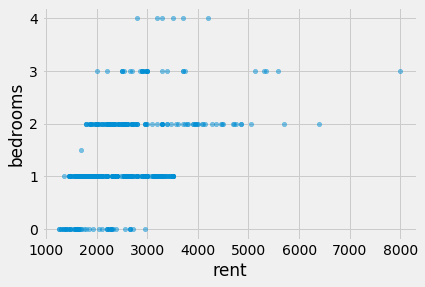

In [12]:
df.plot(kind='scatter', x='rent', y='bedrooms', alpha=.5)

In [13]:
df['rent'].corr(df['bedrooms'])

0.48552850175653933

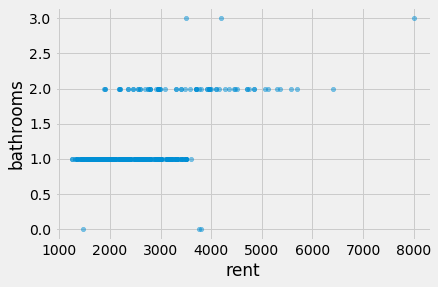

In [14]:
df.plot(kind='scatter', x='rent', y='bathrooms', alpha=.5)

In [15]:
df['rent'].corr(df['bathrooms'])

0.5597590224224869

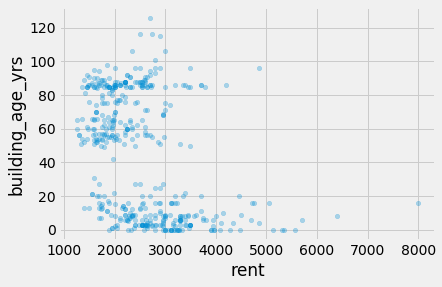

In [16]:
df.plot(kind='scatter', x='rent', y='building_age_yrs', alpha=.3)

In [17]:
df['rent'].corr(df['building_age_yrs'])

-0.4173593625496023

In [19]:
df.corr().style.background_gradient(cmap='coolwarm')

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1,-0.19336,0.0137198,-0.13454,-0.00920764,-0.000713435,-0.144067,0.188281,-0.105299,-0.0118666,0.0162416,-0.0801098,-0.0133505,0.075331,0.0104563,-0.0138688
rent,-0.19336,1,0.485529,0.559759,0.548668,-0.0765479,0.387964,-0.417359,0.284298,0.106541,0.0450679,0.0684346,0.156086,0.0575931,0.0747197,0.132922
bedrooms,0.0137198,0.485529,1,0.523415,0.746195,0.0215932,-0.0686493,0.136151,-0.0971024,-0.0915537,-0.0730973,-0.0579373,-0.0348826,-0.0631592,-0.0104833,-0.0310412
bathrooms,-0.13454,0.559759,0.523415,1,0.558403,-0.0859321,0.124671,-0.0761815,0.00199615,0.0573351,-0.0246167,0.0305928,0.069815,0.0483846,0.0441986,0.0831016
size_sqft,-0.00920764,0.548668,0.746195,0.558403,1,-0.0612103,-0.0487229,0.0384203,-0.0984391,0.00776883,0.00670908,0.0268567,0.107405,0.0299815,0.0527067,0.0731674
min_to_subway,-0.000713435,-0.0765479,0.0215932,-0.0859321,-0.0612103,1,-0.0269589,-0.0938026,0.0684028,-0.00399388,-0.0338173,0.161852,-0.0371646,-0.0526679,-0.029266,-0.0266282
floor,-0.144067,0.387964,-0.0686493,0.124671,-0.0487229,-0.0269589,1,-0.391453,0.321796,0.0564636,-0.0166749,-0.0445597,-0.00873823,0.0146206,-0.0586413,-0.0150939
building_age_yrs,0.188281,-0.417359,0.136151,-0.0761815,0.0384203,-0.0938026,-0.391453,1,-0.376735,-0.0849884,-0.0125252,-0.0467328,-0.0607519,-0.0581877,-0.0278281,-0.059264
no_fee,-0.105299,0.284298,-0.0971024,0.00199615,-0.0984391,0.0684028,0.321796,-0.376735,1,0.0858783,-0.000961568,-0.0264579,0.0256456,-0.00465593,-0.0250235,0.0373689
has_roofdeck,-0.0118666,0.106541,-0.0915537,0.0573351,0.00776883,-0.00399388,0.0564636,-0.0849884,0.0858783,1,0.33896,0.468902,0.612055,0.557983,0.316546,0.608488


In [20]:
import seaborn as sns
import numpy as np

sns.set(style="white")

In [21]:
corr = df.corr()

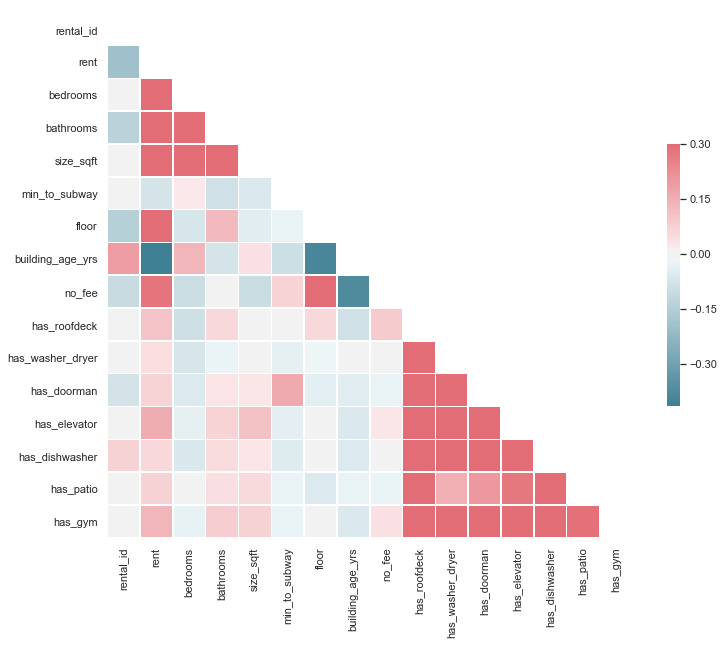

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

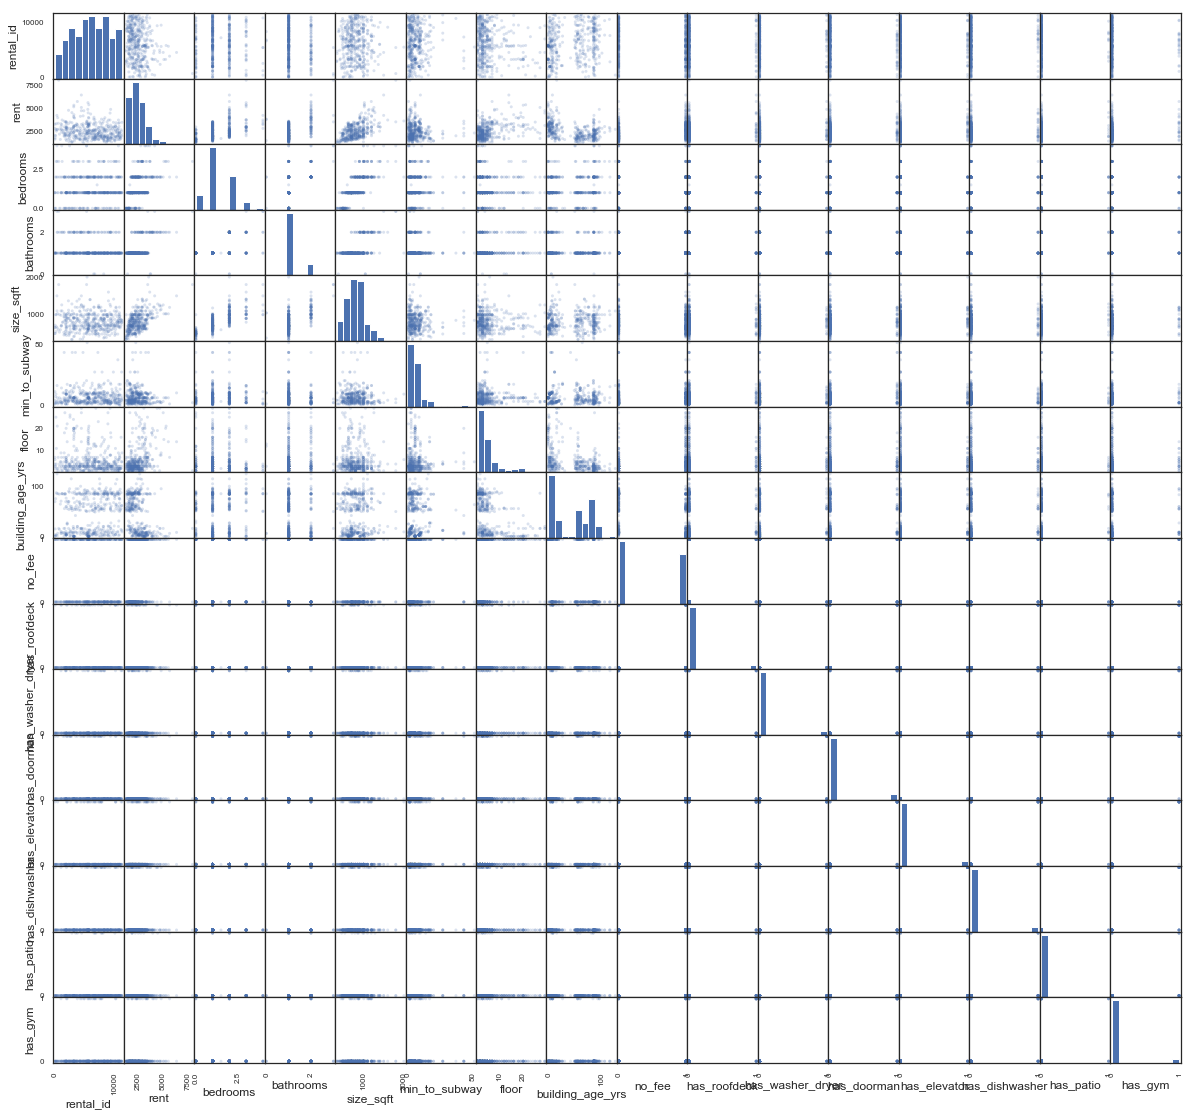

In [24]:
from pandas.plotting import  scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18));

# Spearman Correlation

корреляция ранков, те оценка ко-монотонности двух переменных

- более робастная
- хорошо работает с ранговыми переменными


In [26]:
pd.Series([0, 1, 1000]).rank()

0    1.0
1    2.0
2    3.0
dtype: float64

In [27]:
def byo_spearman_corr(a, b):    
    a_rank, b_rank = a.rank(), b.rank()
    return  byo_corr(a_rank, b_rank)

In [28]:
byo_spearman_corr(a, c)

0.9486832980505138

In [30]:
a.corr(c, method='spearman')

0.9486832980505138

In [31]:
# ?pd.Series.corr

![cubic](https://support.minitab.com/en-us/minitab-express/1/scatterplot_cubic_perfect_relationship.png)

Pearson = +0.851, Spearman = +1

![decrease](https://support.minitab.com/en-us/minitab-express/1/scatterplot_strictly_decreasing_exponential_relationship.png)

Pearson = −0.799, Spearman = −1

![non-linear](https://support.minitab.com/en-us/minitab-express/1/scatterplot_quadratic_model.png)

Coefficient of 0

# Statistical significance

In [32]:
from scipy.stats import pearsonr, spearmanr

In [33]:
pearsonr(a, c)

(0.944911182523068, 0.01539243807330231)

In [34]:
spearmanr(a, c)

SpearmanrResult(correlation=0.9486832980505138, pvalue=0.013846832988859059)

In [35]:
pearsonr(df['rent'], df['floor'])

(0.3879637945979523, 1.529500424333577e-17)

In [36]:
pearsonr(df['rent'], df['building_age_yrs'])

(-0.4173593625496022, 2.6088271214487797e-20)

# Квартет Вискомбе

![wiscombi quartet](http://www.machinelearning.ru/wiki/images/thumb/3/35/Correlation.png/300px-Correlation.png)